Rather than setting up a recoreder and performing SQL queries, lets try doing data science just by calling the HASS [restful-API](https://home-assistant.io/developers/rest_api/). I start by working with localhost and no password is required.

In [82]:
from requests import get, post
import json
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime as dt
%matplotlib inline

def print_json(json_data):
    PrettyPrinter().pprint(json_data)
    
headers = {'content-type': 'application/json'}

Lets first check whats in my config

In [9]:
url = 'http://localhost:8123/api/config'
response = get(url, headers=headers).json()
print_json(response['components'])

['recorder',
 'config.group',
 'discovery',
 'config.automation',
 'cloud',
 'config.customize',
 'config.core',
 'sensor.hue',
 'history',
 'sensor',
 'automation',
 'light.hue',
 'config',
 'websocket_api',
 'config.script',
 'frontend',
 'group',
 'history_graph',
 'sun',
 'system_log',
 'api',
 'sensor.yweather',
 'hue',
 'light',
 'conversation',
 'logbook',
 'http',
 'updater']


I know that **sensor.living_room_motion_sensor** has some data to display

In [43]:
url = 'http://localhost:8123/api/history/period?filter_entity_id=sensor.living_room_motion_sensor' #
response = get(url, headers=headers).json()

In [44]:
data = response[0]

In [45]:
len(data)

46

In [47]:
print_json(data[0])

{'attributes': {'battery': 100,
                'dark': True,
                'daylight': False,
                'friendly_name': 'Living room motion sensor',
                'icon': 'mdi:run-fast',
                'last_updated': ['2018-01-21', '13:57:00'],
                'light_level': 10380,
                'lux': 10.91,
                'temperature': 18.42},
 'entity_id': 'sensor.living_room_motion_sensor',
 'last_changed': '2018-01-21T13:57:36.587538+00:00',
 'last_updated': '2018-01-21T13:57:36.587538+00:00',
 'state': 'off'}


In [33]:
data[0]['last_updated']

'2018-01-21T13:57:36.587538+00:00'

So each last_updated is an event

In [34]:
data[0]['state']

'off'

Lets use a comprehension to get the state data into a dict

In [48]:
living_room_motion_sensor = {v['last_updated']: v['state'] for v in data}

Now lets convert the dict to a pandas series

In [59]:
living_room_motion_sensor_ds = pd.Series(living_room_motion_sensor)

In [60]:
living_room_motion_sensor_ds.head()

2018-01-21T13:57:36.587538+00:00    off
2018-01-21T13:57:53.883990+00:00     on
2018-01-21T13:58:02.936808+00:00    off
2018-01-21T13:58:38.610902+00:00     on
2018-01-21T13:58:48.183434+00:00    off
dtype: object

Lets convert this categorical into numeric for plotting

In [65]:
living_room_motion_sensor_ds = pd.get_dummies(living_room_motion_sensor_ds)['on']

Finally lets do a quick plot

Text(0,0.5,'living_room_motion_sensor')

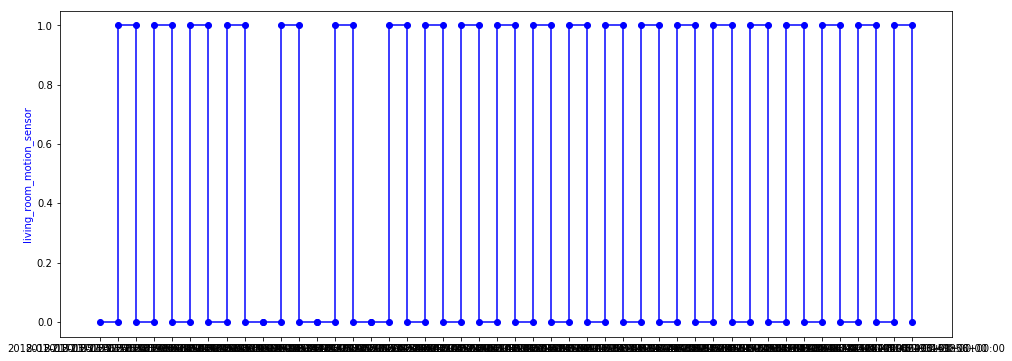

In [84]:
f, ax = plt.subplots(figsize=(16, 6))
ax.step(living_room_motion_sensor_ds, 'bo', where='post')
ax.set_ylabel('living_room_motion_sensor', color='b')